# Part B (Neural Network from Scratch)

You need to implement a neural network from scratch .This is a multiclass classification problem. No. of hidden layers depends on you but should be atleast 2.Remember to use activation function. You can add any other function of your choice.

In [193]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score

In [194]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
# X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [195]:
print(X.shape,y.shape)

(150, 4) (150,)


In [196]:
def initialize_parameters(layer_dims):
  # define the parameters of your nn initially using random lib.
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters


In [197]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / expZ.sum(axis=0, keepdims=True)

In [198]:
def forward_propagation(X, parameters):
    caches = {}
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A
        Z = np.dot(parameters['W' + str(l)], A_prev) + parameters['b' + str(l)]
        A = relu(Z)
        caches['A' + str(l)] = A
        caches['Z' + str(l)] = Z


    ZL = np.dot(parameters['W' + str(L)], A) +  parameters['b' + str(L)]
    AL = softmax(ZL)
    caches['A' + str(L)] = AL
    caches['Z' + str(L)] = ZL

    return AL, caches

In [199]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(AL + 1e-8)) / m
    cost = np.squeeze(cost)
    return cost

In [200]:
# use Gradient descent as of now as an optimizer


In [201]:
def backward_propagation(X, Y, parameters, caches):
    grads = {}
    L = len(parameters) // 2
    m = X.shape[1]
    Y = Y.reshape(caches['A'+str(L)].shape)


    dZL = caches['A' + str(L)] - Y
    grads['dW' + str(L)] = np.dot(dZL, caches['A' + str(L-1)].T) / m
    grads['db' + str(L)] = np.sum(dZL, axis=1, keepdims=True) / m

    for l in reversed(range(1, L)):
        dA = np.dot(parameters['W' + str(l+1)].T, dZL)
        dZ = np.multiply(dA, np.int64(caches['A' + str(l)] > 0))
        grads['dW' + str(l)] = np.dot(dZ, caches['A' + str(l-1)].T) / m if l > 1 else np.dot(dZ,X.T)/m
        grads['db' + str(l)] = np.sum(dZ, axis=1, keepdims=True) / m

        dZL=dZ

    return grads

In [202]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(1, L+1):
        parameters['W' + str(l)] -= learning_rate * grads['dW' + str(l)]
        parameters['b' + str(l)] -= learning_rate * grads['db' + str(l)]

    return parameters

In [211]:
def model(X, Y, layer_dims, learning_rate=0.01, num_iterations=1000, print_cost =False):
    np.random.seed(1)
    cost_history = []
    parameters = initialize_parameters(layer_dims)

    for i in range(0,num_iterations):
        AL, caches = forward_propagation(X, parameters)
        cost = compute_cost(AL, Y)
        grads = backward_propagation(X, Y, parameters, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print("Cost after iteration %i : %f" %(i , cost))
        if i%100==0:
            cost_history.append(cost)

    plt.plot(np.squeeze(cost_history))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per tens)')
    plt.title('Cost reduction over time')
    plt.show()

    return parameters

In [204]:
def predict(X, parameters):
    AL, cac_hes = forward_propagation(X, parameters)
    predictions = np.argmax(AL, axis=0)
    return predictions

In [205]:
def compute_f1_score(y_true,y_pred):
  from sklearn.metrics import f1_score
  return f1_score(y_true,y_pred,average='weighted')

Cost after iteration 0 : 1.098629
Cost after iteration 100 : 1.098483
Cost after iteration 200 : 1.098358
Cost after iteration 300 : 1.098208
Cost after iteration 400 : 1.098033
Cost after iteration 500 : 1.097801
Cost after iteration 600 : 1.097472
Cost after iteration 700 : 1.096981
Cost after iteration 800 : 1.096212
Cost after iteration 900 : 1.094944
Cost after iteration 1000 : 1.092702
Cost after iteration 1100 : 1.088328
Cost after iteration 1200 : 1.078861
Cost after iteration 1300 : 1.055547
Cost after iteration 1400 : 0.994610
Cost after iteration 1500 : 0.869428
Cost after iteration 1600 : 0.736286
Cost after iteration 1700 : 0.607303
Cost after iteration 1800 : 0.496452
Cost after iteration 1900 : 0.424864


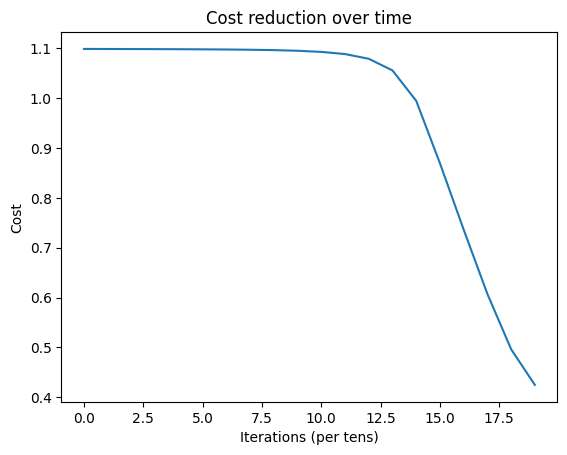

F1 score: 0.9463231347289318


In [213]:
layer_dims = [4, 128, 64, 3]
y=y.astype(int)
Y=np.eye(3)[y.reshape(-1)].T
parameters = model(X.T, Y, layer_dims, learning_rate=0.01, num_iterations=2000,print_cost=True)

predictions=predict(X.T,parameters)
f1=compute_f1_score(y,predictions)

print("F1 score:",f1)